# Hidden Markov Model Program with Own Dataset

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Defining Model Parameters

In [2]:
states = ['Sunny', 'Rainy', 'Cloudy']
n_states = len(states)
print("No. of Hidden States: ", n_states)

obs = ['Shorts', 'Coat', 'Umbrella']
n_obs = len(obs)
print("No. of Observations: ", n_obs)

No. of Hidden States:  3
No. of Observations:  3


In [3]:
state_prob = np.array([0.75, 0.2, 0.05])
print("State probability:\n", state_prob)

trans_prob = np.array([[0.8, 0.15, 0.05],
                       [0.38, 0.6, 0.02],
                       [0.75, 0.05, 0.2]])
print("\nTransition probability:\n", trans_prob)

emiss_prob = np.array([[0.6, 0.3, 0.1],
                       [0.05, 0.3, 0.65],
                       [0.0, 0.5, 0.5]])
print("\nEmission probability:\n", emiss_prob)

State probability:
 [0.75 0.2  0.05]

Transition probability:
 [[0.8  0.15 0.05]
 [0.38 0.6  0.02]
 [0.75 0.05 0.2 ]]

Emission probability:
 [[0.6  0.3  0.1 ]
 [0.05 0.3  0.65]
 [0.   0.5  0.5 ]]


# Creating Model and Setting Parameters

In [4]:
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_prob
model.transmat_ = trans_prob
model.emissionprob_ = emiss_prob

# Defining Observation Sequence and Predicting Likely States

In [5]:
obs_seq = np.array([1, 1, 2]).reshape(-1, 1)
print("Observation Sequence:\n", obs_seq)

hidden_states = model.predict(obs_seq)
print("\nMost likely hidden states:\n", hidden_states)

Observation Sequence:
 [[1]
 [1]
 [2]]

Most likely hidden states:
 [0 0 1]


# Decoding Observation Sequence

In [6]:
log_prob, hidden_states = model.decode(obs_seq, lengths = len(obs_seq), algorithm ='viterbi')
 
print("Log Probability:",log_prob)
print("Most likely hidden states:", hidden_states)

Log Probability: -5.246674133396199
Most likely hidden states: [0 0 1]


# Plotting Results

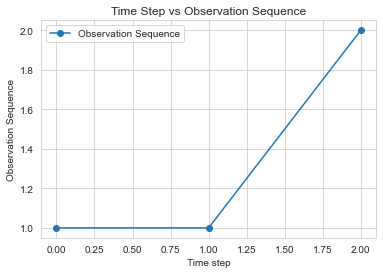

In [7]:
sns.set_style("whitegrid")
plt.plot(obs_seq, '-o', label="Observation Sequence")
plt.xlabel('Time step')
plt.ylabel('Observation Sequence')
plt.title("Time Step vs Observation Sequence")
plt.legend()
plt.show()

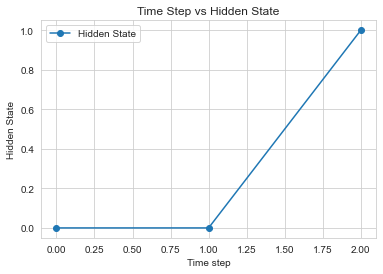

In [8]:
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Hidden State')
plt.title("Time Step vs Hidden State")
plt.legend()
plt.show()

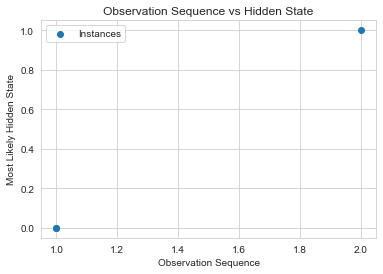

In [9]:
sns.set_style("whitegrid")
plt.scatter(obs_seq, hidden_states, label='Instances')
plt.xlabel('Observation Sequence')
plt.ylabel('Most Likely Hidden State')
plt.title("Observation Sequence vs Hidden State")
plt.legend()
plt.show()

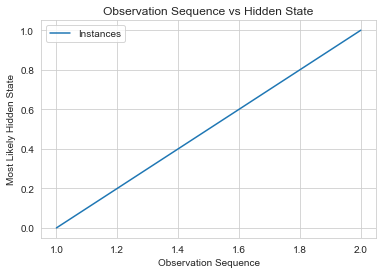

In [10]:
sns.set_style("whitegrid")
plt.plot(obs_seq, hidden_states, label='Instances')
plt.xlabel('Observation Sequence')
plt.ylabel('Most Likely Hidden State')
plt.title("Observation Sequence vs Hidden State")
plt.legend()
plt.show()